# 선형회귀분석

## Linear regression example 1

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
student = pd.read_csv('data/student.csv') # 데이터 읽기

In [3]:
student.head(100)

,language,english,math,science
0,55,91,33,51
1,60,85,52,43
2,45,89,21,18
3,75,30,95,98
4,60,88,40,31
5,60,83,51,47
6,63,63,62,65
7,54,49,58,60
8,53,93,31,42
9,28,37,89,97


In [4]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
language    20 non-null int64
english     20 non-null int64
math        20 non-null int64
science     20 non-null int64
dtypes: int64(4)
memory usage: 720.0 bytes


In [5]:
student.describe() # 데이터 기초통계량 확인

,language,english,math,science
count,20.000000,20.00000,20.000000,20.000000
mean,58.950000,68.95000,54.850000,56.250000
std,11.591626,25.07982,23.862049,25.894269
min,28.000000,28.00000,21.000000,18.000000
25%,54.000000,48.75000,35.500000,36.250000
50%,60.000000,84.00000,51.500000,49.000000
75%,63.250000,88.25000,65.250000,68.250000
max,76.000000,97.00000,100.000000,100.000000


In [6]:
# 피어슨 상관계수
pd.concat([student, student], axis=1).corr(method='pearson')

,language,english,math,science,language,english,math,science
language,1.000000,-0.125833,0.183212,0.090698,1.000000,-0.125833,0.183212,0.090698
english,-0.125833,1.000000,-0.945780,-0.919824,-0.125833,1.000000,-0.945780,-0.919824
math,0.183212,-0.945780,1.000000,0.951689,0.183212,-0.945780,1.000000,0.951689
science,0.090698,-0.919824,0.951689,1.000000,0.090698,-0.919824,0.951689,1.000000
language,1.000000,-0.125833,0.183212,0.090698,1.000000,-0.125833,0.183212,0.090698
english,-0.125833,1.000000,-0.945780,-0.919824,-0.125833,1.000000,-0.945780,-0.919824
math,0.183212,-0.945780,1.000000,0.951689,0.183212,-0.945780,1.000000,0.951689
science,0.090698,-0.919824,0.951689,1.000000,0.090698,-0.919824,0.951689,1.000000


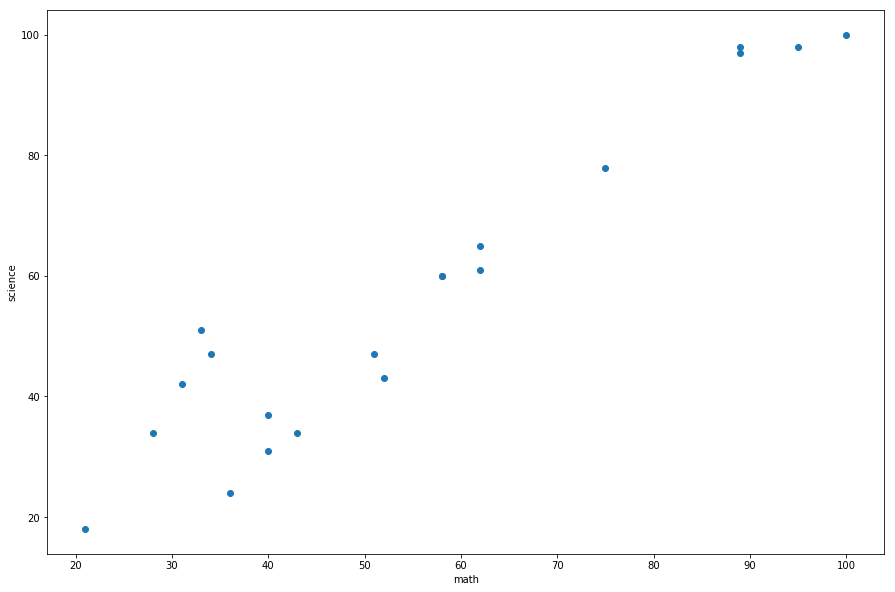

0.95168911053673177

In [7]:
plt.clf()
plt.figure(figsize=(15, 10))
plt.xlabel('math')
plt.ylabel('science')
plt.scatter(student['math'], student['science'])
plt.show()
# 수학과 과학과의 상관계수
np.corrcoef(student['math'], student['science'])[0, 1]

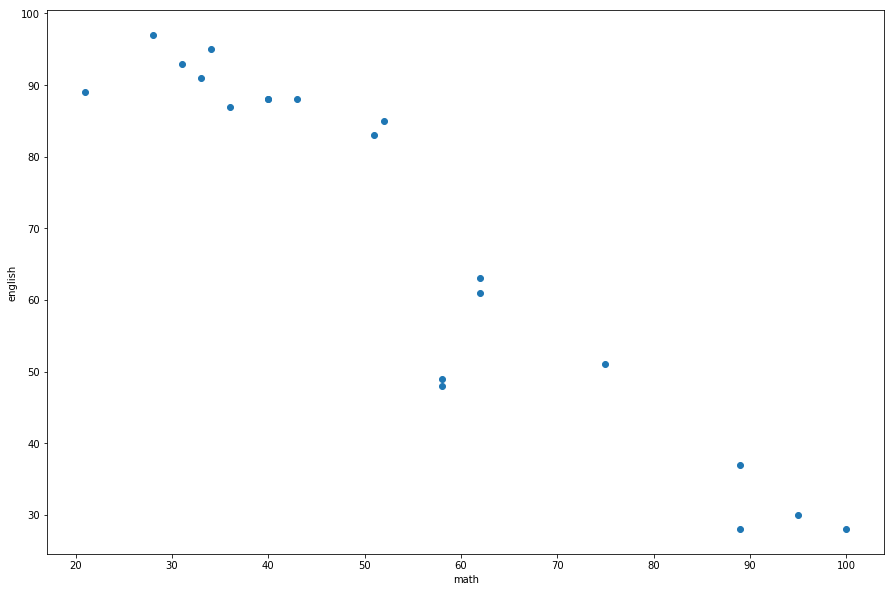

-0.94578048089858313

In [8]:
plt.clf()
plt.figure(figsize=(15, 10))
plt.xlabel('math')
plt.ylabel('english')
plt.scatter(student['math'], student['english'])
plt.show()
# 수학과 영어과의 상관계수
np.corrcoef(student['math'], student['english'])[0, 1]

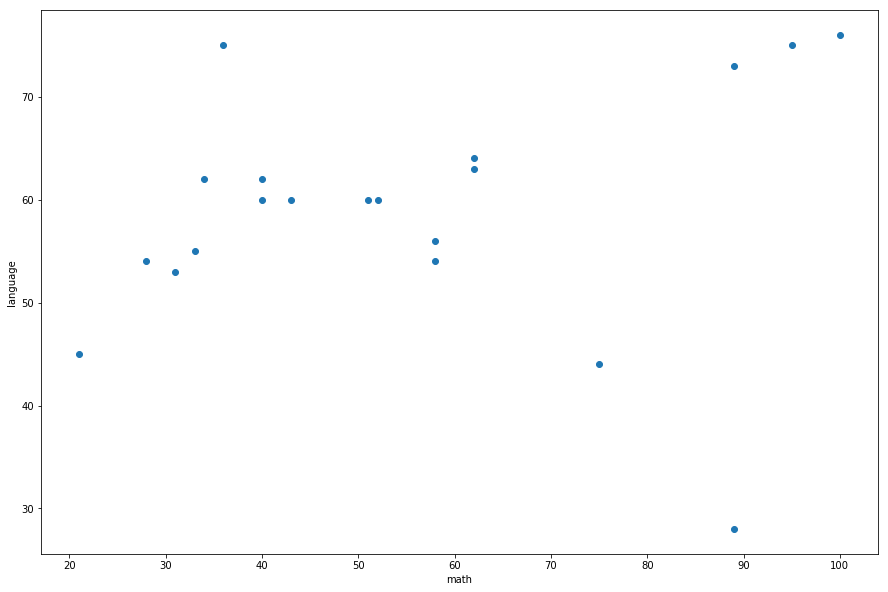

0.18321159342393156

In [9]:
plt.clf()
plt.figure(figsize=(15, 10))
plt.xlabel('math')
plt.ylabel('language')
plt.scatter(student['math'], student['language'])
plt.show()
# 수학과 언어와의 상관계수
np.corrcoef(student['math'], student['language'])[0, 1]

In [10]:
# 스피어만 상관계수
pd.concat([student, student], axis=1).corr(method='spearman')

,language,english,math,science,language,english,math,science
language,1.000000,-0.316428,0.362091,0.242150,1.000000,-0.316428,0.362091,0.242150
english,-0.316428,1.000000,-0.941154,-0.802339,-0.316428,1.000000,-0.941154,-0.802339
math,0.362091,-0.941154,1.000000,0.878205,0.362091,-0.941154,1.000000,0.878205
science,0.242150,-0.802339,0.878205,1.000000,0.242150,-0.802339,0.878205,1.000000
language,1.000000,-0.316428,0.362091,0.242150,1.000000,-0.316428,0.362091,0.242150
english,-0.316428,1.000000,-0.941154,-0.802339,-0.316428,1.000000,-0.941154,-0.802339
math,0.362091,-0.941154,1.000000,0.878205,0.362091,-0.941154,1.000000,0.878205
science,0.242150,-0.802339,0.878205,1.000000,0.242150,-0.802339,0.878205,1.000000


## Linear regression example 1
- 선형회귀분석을 통해 과학(science) 성적을 이용하여 수학(math)성적 예측

In [11]:
# 회귀분석
from sklearn import linear_model

In [12]:
X = student['science']
y = student['math']

# 모듈에 맞게 data reshape
X = X.values.reshape(len(X), 1)
y = y.values.reshape(len(X), 1)

In [13]:
# 훈련데이어, 테스트 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

In [14]:
y_test

array([[ 75],
       [ 31],
       [ 28],
       [100],
       [ 51]], dtype=int64)

In [15]:
# 선형 회귀분석 모델 생성
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score (X_test, y_test))

Coefficients: 
 [[ 0.81443861]]
Mean squared error: 68.13
Variance score: 0.91


In [17]:
# 학생이 받은 과학성적 값(예: 50점) 입력
preds = regr.predict(X=50)
print(preds)

[[ 50.1154362]]


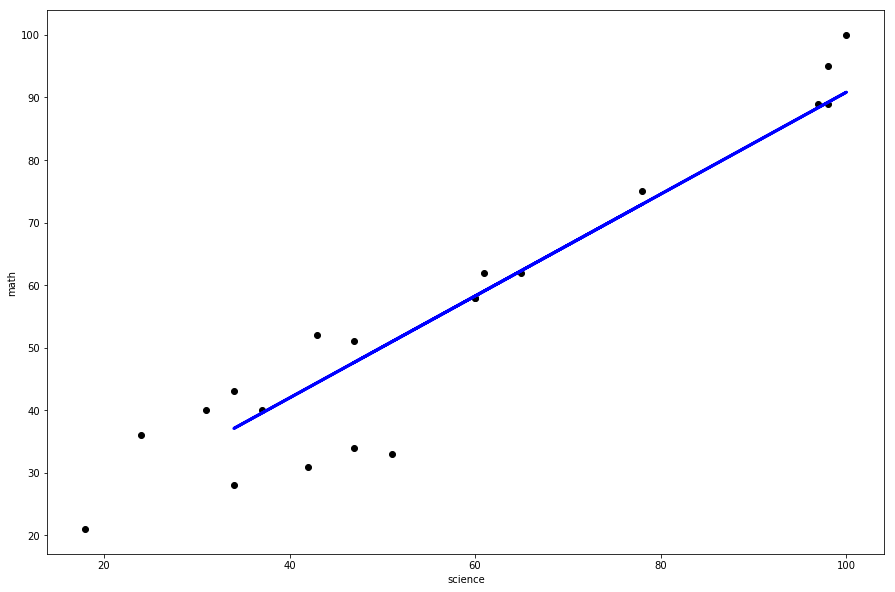

In [18]:
plt.clf()
plt.figure(figsize=(15, 10))
plt.xlabel('science')
plt.ylabel('math')
plt.scatter(X, y,  color='black')
plt.plot(X_test, regr.predict(X_test), color='blue', linewidth=3)
plt.show()

### 실습예제1
테스트 데이터 비율을 0.2로 수정하고 학생이 받은 과학성적이 80일때 수학성적을 예측하시오.

In [19]:
# 회귀분석
from sklearn import linear_model

In [20]:
X = student['science']
y = student['math']

# 모듈에 맞게 data reshape
X = X.values.reshape(len(X), 1)
y = y.values.reshape(len(X), 1)

In [21]:
# 훈련데이어, 테스트 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [22]:
# 선형 회귀분석 모델 생성
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
# 학생이 받은 과학성적 값(예: 50점) 입력
preds = regr.predict(X=50)
print(preds)

[[ 50.33486731]]


## Linear regression example 2
- 다중 선형회귀분석을 통해 과학(science), 언어(language), 영어(english)가 성적을 이용하여 수학(math)성적 예측

In [24]:
# 다중 회귀 분석
X = student[['science', 'language' ,'english']]
y = student['math']

In [25]:
# 훈련데이터, 테스트 데이터
from sklearn.model_selection import train_test_split
X.values.tolist()
y = y.values.reshape(len(X), 1) # 배열 형태 변경

# 훈련데이터, 테스트 데이터 분리(테스트 데이터 비율(0.25))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33) 

In [26]:
# 선형 회귀 분석 모델 생성
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
# 학생이 받은 성적 값(예: 과학: 89점, 언어: 50점, 영어: 40점) 입력
table = np.array([100, 100, 50])
# 수학 성적 예측
preds = regr.predict(table.reshape(1,-1))
print(preds)

[[ 89.05862169]]


## Linear regression example 3
- 선형회귀분석을 통해 매장을 둘러보는 횟수(view)을 이용해 매출액(payment)를 예측

In [28]:
# 매장 매출 예측 예
mydata2 = pd.read_csv('data/mydata2.csv')
mydata2.head(5)

,id,walk,view,sex,payment,country
0,1,15,5,M,176,C
1,2,15,5,M,194,C
2,3,27,12,F,384,C
3,4,24,9,F,329,C
4,5,21,8,F,290,C


In [29]:
X = mydata2['view'] # 설명변수
y = mydata2['payment'] # 목적변수

In [30]:
from sklearn.model_selection import train_test_split
X = X.values.reshape(len(X), 1)
y = y.values.reshape(len(y), 1)
# 훈련데이터, 테스트 데이터 분리(테스트 데이터 비율(0.25))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

In [31]:
# 선형 회귀분석 모델 생성
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
# view가 30일때 payment 예측
preds = regr.predict(30)
print(preds)

[[ 654.37586279]]


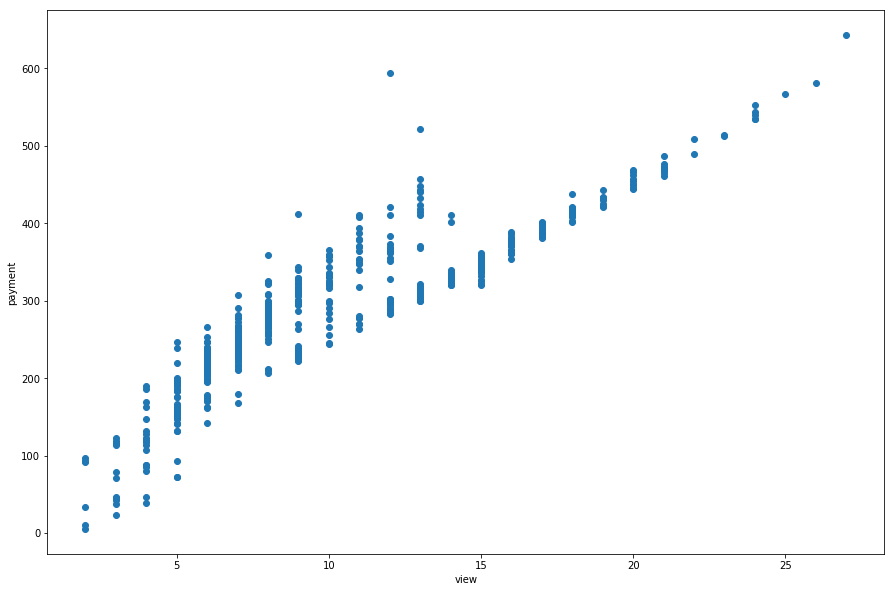

In [33]:
plt.clf()
plt.figure(figsize=(15, 10))
plt.xlabel('view')
plt.ylabel('payment')
plt.scatter(mydata2['view'], mydata2['payment'])
plt.show()

## Linear regression example 4
- 선형 회귀분석을 통해 걷는 시간(walk)을 이용한 매출액(payment) 예측

In [34]:
# walk를 이용한 payment 예측
X = mydata2['walk']
y = mydata2['payment']

In [35]:
from sklearn.model_selection import train_test_split
X = X.values.reshape(len(X), 1)
y = y.values.reshape(len(y), 1)
# 훈련데이터, 테스트 데이터 분리(테스트 데이터 비율(0.25))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

In [36]:
# 선형 회귀분석 모델 생성
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
# walk가 40일때 payment 예측
preds = regr.predict(40)
print(preds)

[[ 380.87943924]]


### 실습예제2
매장매출데이터(mydata2.csv)를 살펴보고 다중 선형회귀분석을 통해 걷는시간(walk), 매장을 둘러보는 횟수(view)를 이용하여 걷는시간이 30, 매장을 둘러보는 횟수가 15일때 매출액(payment)을 예측하시오

In [38]:
# 매장 매출 예측 예
df = pd.read_csv('data/mydata2.csv')
df.head(5)

,id,walk,view,sex,payment,country
0,1,15,5,M,176,C
1,2,15,5,M,194,C
2,3,27,12,F,384,C
3,4,24,9,F,329,C
4,5,21,8,F,290,C


In [39]:
# 다중 회귀 분석
X = df[['walk', 'view']]
y = df['payment']

In [40]:
# 훈련데이터, 테스트 데이터
from sklearn.model_selection import train_test_split
X.values.tolist()
y = y.values.reshape(len(X), 1) # 배열 형태 변경

# 훈련데이터, 테스트 데이터 분리(테스트 데이터 비율(0.25))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33) 

In [41]:
# 선형 회귀 분석 모델 생성
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
# 걷는시간 30, 매장을 둘러보는 횟수 15
table = np.array([30, 15])
# 매출액 예측
preds = regr.predict(table.reshape(1,-1))
print(preds)

[[ 411.98292433]]
